In [2]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np

# 2. Load enriched JSON data
df = pd.read_json("../output/enriched_with_email.json")

# 3. Show basic info
df.info()

# 4. Preview the data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              830 non-null    object 
 1   profile_url       830 non-null    object 
 2   website           751 non-null    object 
 3   location          830 non-null    object 
 4   hourly_rate       830 non-null    object 
 5   employee_range    830 non-null    object 
 6   min_project_size  830 non-null    object 
 7   review_count      488 non-null    float64
 8   rating            488 non-null    float64
 9   description       530 non-null    object 
 10  email             352 non-null    object 
dtypes: float64(2), object(9)
memory usage: 71.5+ KB


,name,profile_url,website,location,hourly_rate,employee_range,min_project_size,review_count,rating,description,email
0,Digis,https://clutch.co/profile/digis,https://digiscorp.com/python-development-servi...,"London, England",$25 - $49 / hr,50 - 249,"$5,000+",79.0,4.8,Digis is a comprehensive web development compa...,None
1,Saritasa,https://clutch.co/profile/saritasa,https://www.saritasa.com/python-development/?u...,"Newport Beach, CA",$100 - $149 / hr,50 - 249,"$50,000+",98.0,4.8,Saritasa is a comprehensive web development co...,info@saritasa.com
2,Geniusee,https://clutch.co/profile/geniusee,https://geniusee.com/?utm_source=Clutch&utm_me...,"Warszawa, Poland",$25 - $49 / hr,50 - 249,"$50,000+",65.0,5.0,Geniusee is a highly regarded software and web...,info@geniusee.com
3,Appunite,https://clutch.co/profile/appunite,https://www.appunite.com/clutch?utm_source=clu...,"Poznań, Poland",$50 - $99 / hr,50 - 249,"$10,000+",21.0,4.9,Appunite is a versatile software development c...,usContactbusiness@appunite.comcareer
4,Bluelight,https://clutch.co/profile/bluelight,https://bluelight.co/?utm_source=clutch.co&utm...,"Sacramento, CA",$25 - $49 / hr,50 - 249,"$10,000+",15.0,5.0,Bluelight is a web development company that sp...,None


In [3]:
# Clean email field (convert empty strings to NaN)
df["email"] = df["email"].replace("", np.nan)

# Check missing values
df.isnull().sum()

# Drop rows with missing profile_url (essential identifier)
df = df.dropna(subset=["profile_url"])

# Drop duplicate companies based on profile_url
df = df.drop_duplicates(subset=["profile_url"])

# Optional: Reset index after cleaning
df = df.reset_index(drop=True)

# Display result
df.shape, df.head()


((530, 11),
         name                          profile_url  \
 0      Digis      https://clutch.co/profile/digis   
 1   Saritasa   https://clutch.co/profile/saritasa   
 2   Geniusee   https://clutch.co/profile/geniusee   
 3   Appunite   https://clutch.co/profile/appunite   
 4  Bluelight  https://clutch.co/profile/bluelight   
 
                                              website           location  \
 0  https://digiscorp.com/python-development-servi...    London, England   
 1  https://www.saritasa.com/python-development/?u...  Newport Beach, CA   
 2  https://geniusee.com/?utm_source=Clutch&utm_me...   Warszawa, Poland   
 3  https://www.appunite.com/clutch?utm_source=clu...     Poznań, Poland   
 4  https://bluelight.co/?utm_source=clutch.co&utm...     Sacramento, CA   
 
         hourly_rate employee_range min_project_size  review_count  rating  \
 0    $25 - $49 / hr       50 - 249          $5,000+          79.0     4.8   
 1  $100 - $149 / hr       50 - 249         $50,

In [4]:
# Count how many companies have an email
email_counts = df["email"].notna().value_counts()
email_ratio = df["email"].notna().mean()

print(f"✅ Companies with email: {email_counts[True]}")
print(f"❌ Companies without email: {email_counts[False]}")
print(f"📊 Email coverage: {email_ratio:.2%}")


✅ Companies with email: 217
❌ Companies without email: 313
📊 Email coverage: 40.94%


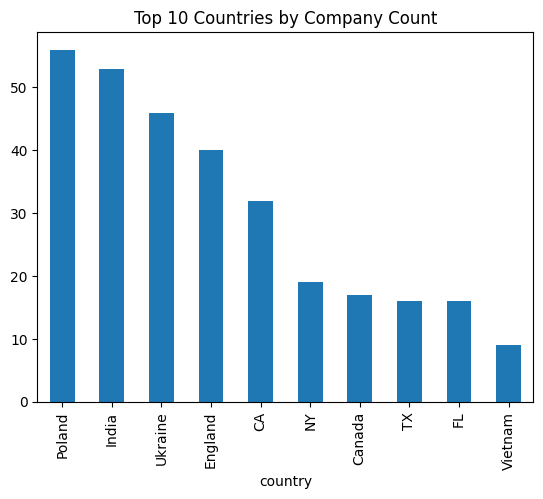

In [7]:
# Extract country from 'location' (assumes format like "City, Country")
df["country"] = df["location"].str.extract(r",\s*(.+)$")

# Show top countries by count
df["country"].value_counts().head(10).plot(kind="bar", title="Top 10 Countries by Company Count");


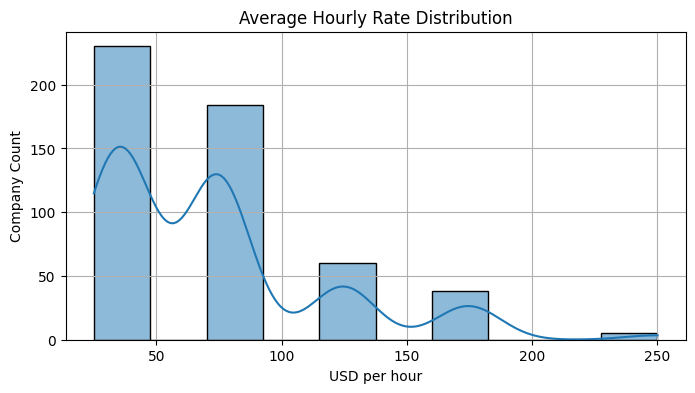

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the 'hourly_rate' column (e.g. "$25 - $49 / hr" → [25, 49])
def parse_hourly_rate(rate_str):
    if pd.isna(rate_str) or "Undisclosed" in rate_str:
        return None
    rate_str = rate_str.replace("/ hr", "").replace("hr", "").replace("$", "").replace("<", "").replace(">", "").replace(" ", "")
    parts = rate_str.split("-")
    try:
        nums = [int(p) for p in parts if p.isdigit()]
        return sum(nums) / len(nums) if nums else None
    except:
        return None

df["hourly_rate_avg"] = df["hourly_rate"].apply(parse_hourly_rate)

# Plot distribution
plt.figure(figsize=(8, 4))
sns.histplot(df["hourly_rate_avg"].dropna(), bins=10, kde=True)
plt.title("Average Hourly Rate Distribution")
plt.xlabel("USD per hour")
plt.ylabel("Company Count")
plt.grid(True)
plt.show()


In [13]:
df["hourly_rate_avg"] = df["hourly_rate"].apply(parse_hourly_rate)
print(df["hourly_rate_avg"].describe())

count    517.000000
mean      71.622824
std       45.112670
min       25.000000
25%       37.000000
50%       74.500000
75%       74.500000
max      250.000000
Name: hourly_rate_avg, dtype: float64


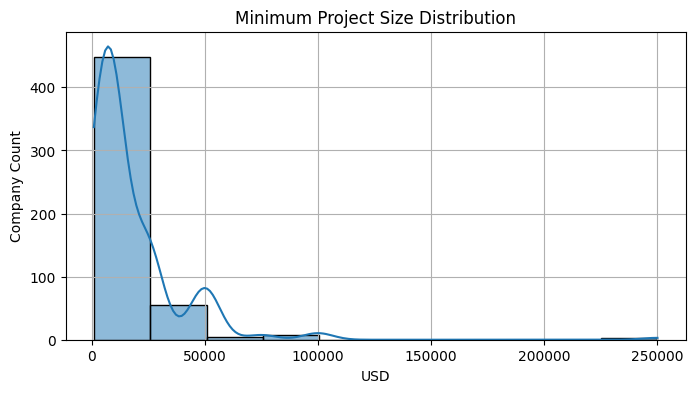

In [9]:
def parse_project_size(size_str):
    if pd.isna(size_str):
        return None
    try:
        num = int(size_str.replace("$", "").replace(",", "").replace("+", "").strip())
        return num
    except:
        return None

df["min_project_usd"] = df["min_project_size"].apply(parse_project_size)

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(df["min_project_usd"].dropna(), bins=10, kde=True)
plt.title("Minimum Project Size Distribution")
plt.xlabel("USD")
plt.ylabel("Company Count")
plt.grid(True)
plt.show()


C:\Users\bahad\AppData\Local\Temp\ipykernel_18284\1638267821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="employee_range", order=df["employee_range"].value_counts().index, palette="viridis")


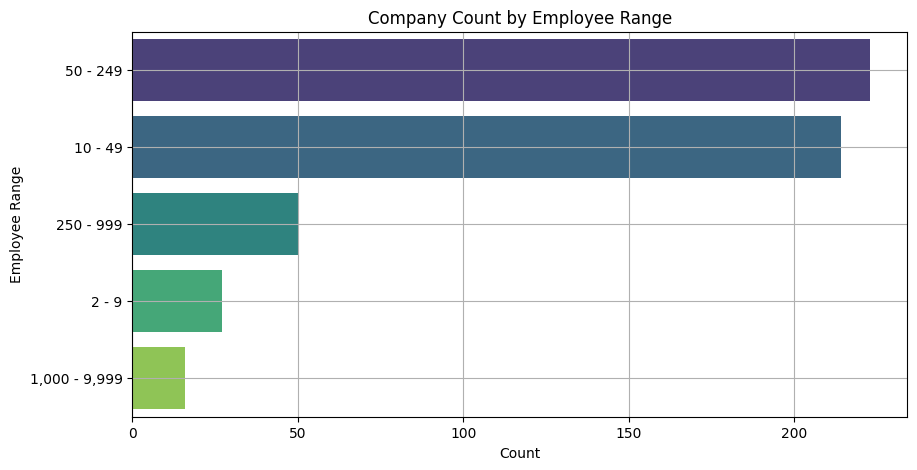

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="employee_range", order=df["employee_range"].value_counts().index, palette="viridis")
plt.title("Company Count by Employee Range")
plt.xlabel("Count")
plt.ylabel("Employee Range")
plt.grid(True)
plt.show()


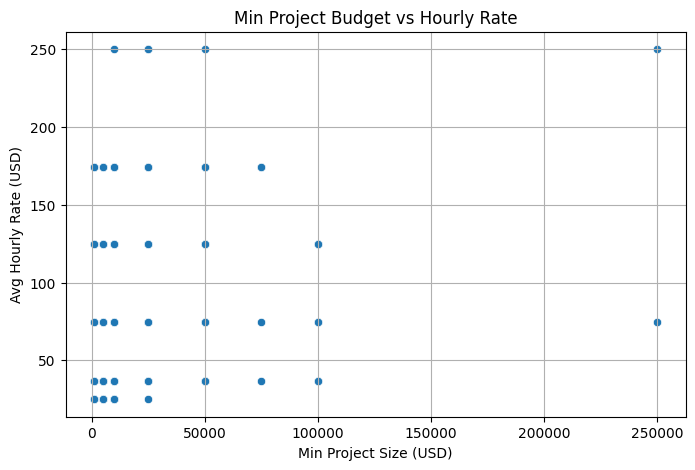

In [18]:
# Convert min project size to numeric (e.g. "$5,000+" → 5000)
def parse_min_project_size(val):
    if isinstance(val, str) and "$" in val:
        num = ''.join(c for c in val if c.isdigit() or c == ',')
        return int(num.replace(",", "")) if num else None
    return None

df["min_project_usd"] = df["min_project_size"].apply(parse_min_project_size)

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="min_project_usd", y="hourly_rate_avg")
plt.title("Min Project Budget vs Hourly Rate")
plt.xlabel("Min Project Size (USD)")
plt.ylabel("Avg Hourly Rate (USD)")
plt.grid(True)
plt.show()


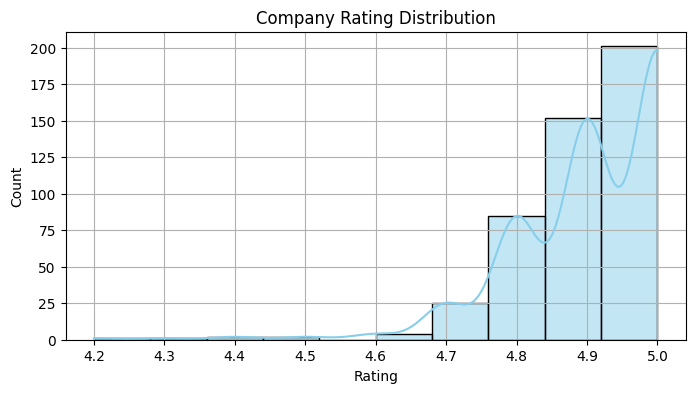

In [19]:
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")

plt.figure(figsize=(8, 4))
sns.histplot(df["rating"].dropna(), bins=10, kde=True, color="skyblue")
plt.title("Company Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.grid(True)
plt.show()
